<a href="https://colab.research.google.com/github/francianerod/Alerta-Raios/blob/main/5_Alerta_Raios_Radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Inspirado no trabalho de Camila da Cunha Lopes: https://github.com/cclopes**

**Código adaptado por:** Franciane Rodrigues

**Empresa:** EPL Informática Ltda

**Área/Setor:** Operacional/Pesquisa e Desenvolvimento

**Motivo do código:** Caracterização do Campo Elétrico no Vale do Paraíba - SP

**Parte 5:** Abertura dos dados de radar meteorológico 


# **1) Para abertura no Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2) Instalação de pacotes**

In [2]:
"""
# Ao baixar os pacotes uma única vez, desligar o comando da célula.

#Instalando pacotes necessários para execução da visualização
!pip install cartopy
!pip uninstall -y shapely 
!pip install shapely --no-binary shapely
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical
!python cartopy_feature_download.py cultural
!pip install arm-pyart
"""

'\n# Ao baixar os pacotes uma única vez, desligar o comando da célula.\n\n#Instalando pacotes necessários para execução da visualização\n!pip install cartopy\n!pip uninstall -y shapely \n!pip install shapely --no-binary shapely\n!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py\n!python cartopy_feature_download.py physical\n!python cartopy_feature_download.py cultural\n!pip install arm-pyart\n'

## **3) Importando pacotes**

In [3]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import pyart
from cftime import num2date, date2num

import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):


**Especificações dos dados são encontrados no link abaixo:** 

http://ftp.cptec.inpe.br/chuva/read_me/glm_vale_paraiba/eq_radar/esp_band_x/level_1/readme_and_codes/radar_info_dir_list.txt

**Fonte de dados utilizados neste código**:

http://ftp.cptec.inpe.br/chuva/glm_vale_paraiba/experimental/level_1/eq_radar/esp_band_x/st_univap/SaoJoseCampos1.vol/UF/2011/11/


## **4) Exploração dos dados**

In [4]:
# Abertura da base de dados e utilizacaçõ do pacote Pyart

dataset = '/content/drive/MyDrive/Alerta_Raios_Análise/radar_dados/level1_x_sjc_vol_RADL14071820111128204205.UF'
radar = pyart.io.read(dataset)

In [5]:
"""
# Informações gerais dos dados, em caso necessário.
radar.info()
print(radar.fields.keys())

# Observação: Os dados acima possuem os campos de 'corrected_reflectivity' e 'corrected_differential_reflectivity'
"""

"\n# Informações gerais dos dados, em caso necessário.\nradar.info()\nprint(radar.fields.keys())\n\n# Observação: Os dados acima possuem os campos de 'corrected_reflectivity' e 'corrected_differential_reflectivity'\n"

## **5) Visualização dos dados**

In [6]:
#Abertura do dataset com pyart

display = pyart.graph.RadarMapDisplay(radar)

In [7]:
# Tipo de projeção recomendada no pacote Pyart, podendo ser mudada ao gosto pessoal

projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

In [8]:
# Construção da hora como título automático
# Não esqueça de mudar o valor da elevação a ser estudada [0,1,...,12] possibilidades

time_start = num2date(radar.time['data'][0], radar.time['units'])
time_text = ' ' + time_start.strftime('%d/%m/%Y as %H:%M:%S UTC')
elevacao = radar.fixed_angle['data'][0]
title = 'Radar de São José dos Campos (SP) - PPI - ' + 'Elevação de %.2f' % (elevacao) + '° -' + time_text
title

'Radar de São José dos Campos (SP) - PPI - Elevação de 1.00° - 28/11/2011 as 20:45:17 UTC'

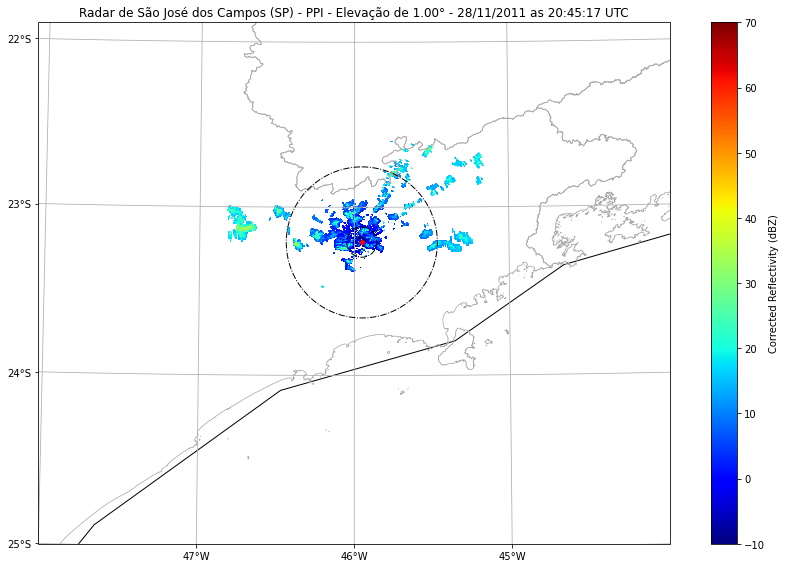

In [9]:
# Execução da visualização dos dados do radar

"""
Não esqueça de mudar o valor do sweep para o mesmo valor da elevação.
elevacao = radar.fixed_angle['data'][12] e sweep = 12
Isso fará que ambos estejam com o nome correto na saída gráfica
Escalas de resolução: "110m", "50m" e "10m".

"""
fig = plt.figure(figsize=(12, 8)) # Largura, altura
display.plot_ppi_map('corrected_reflectivity', sweep = 0, resolution='110m', vmin=-10., vmax=70,
                     min_lon=-48., max_lon=-44., min_lat=-25., max_lat=-21.9,
                     lon_lines=np.arange(-48., -44),
                     lat_lines=np.arange(-25., -21.9), 
                     projection=projection,
                     fig=fig,
                     lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],
                     colorbar_label="Corrected Reflectivity (dBZ)",
                     title=title, cmap='jet',
                     shapefile='/content/drive/MyDrive/Alerta_Raios_Análise/shape_map/BR_UF_2019.shp',
                     shapefile_kwargs={ "facecolor": "None",
                                        "edgecolor": "darkgray",
                                        "linewidth": 0.75
                                       }
                     )

#Localização do Radar de São José dos Campos (SP), conforme documentação do README.
display.plot_point(-45.952187, -23.208702, 
                   label_text='', 
                   markersize=3, 
                   markeredgewidth=2, 
                   color='red')

#Anéis de 10 e 50 km, respectivamente.
display.plot_range_rings([10, 50], ls='dashdot', lw=1)

#Ajuste automático dos parâmetros da plotagem gráfica para fornecer o preenchimento especificado.
plt.tight_layout()

#Salva a figura
#plt.savefig('radar_teste.png', dpi=300)
plt.show()

## **6) Seção transversal de um volume PPI**

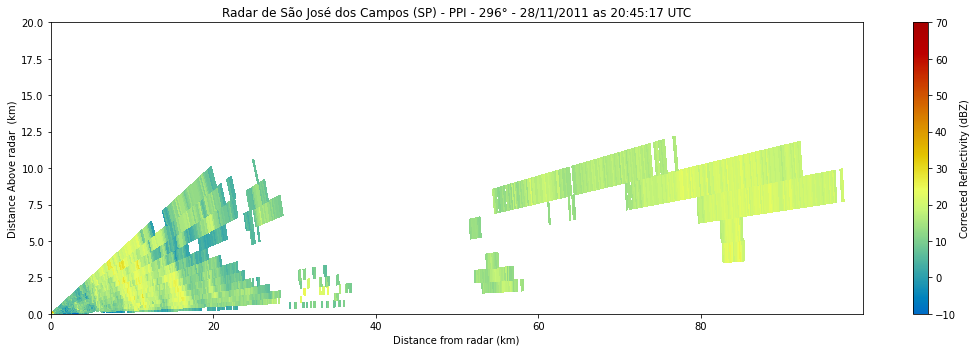

In [10]:
# SCRIPT Completo
# Autor: Camila da Cunha Lopes
# Adaptado por: Franciane Rodrigues

import numpy as np
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import pyart
from cftime import num2date, date2num
import warnings
warnings.filterwarnings("ignore")

# Gráfico de refletividade em toda a extensão do azimute de interesse (296°)

dataset = '/content/drive/MyDrive/Alerta_Raios_Análise/radar_dados/level1_x_sjc_vol_RADL14071820111128204205.UF'
radar = pyart.io.read(dataset)
sjc = pyart.util.cross_section_ppi(radar, [296])
display = pyart.graph.RadarDisplay(sjc)

time_start = num2date(radar.time['data'][0], radar.time['units'])
time_text = ' ' + time_start.strftime('%d/%m/%Y as %H:%M:%S UTC')
title2 = 'Radar de São José dos Campos (SP) - PPI - ' + '296° -' + time_text


fig = plt.figure(figsize=(15, 5))
display.plot('corrected_reflectivity', vmin=-10., vmax=70.,
             colorbar_label='Corrected Reflectivity (dBZ)', 
             title=title2)
plt.ylim((0,20))

plt.tight_layout()
plt.show()


## **7) Distribuição da refletividade corrigida em um raio de 100 km**

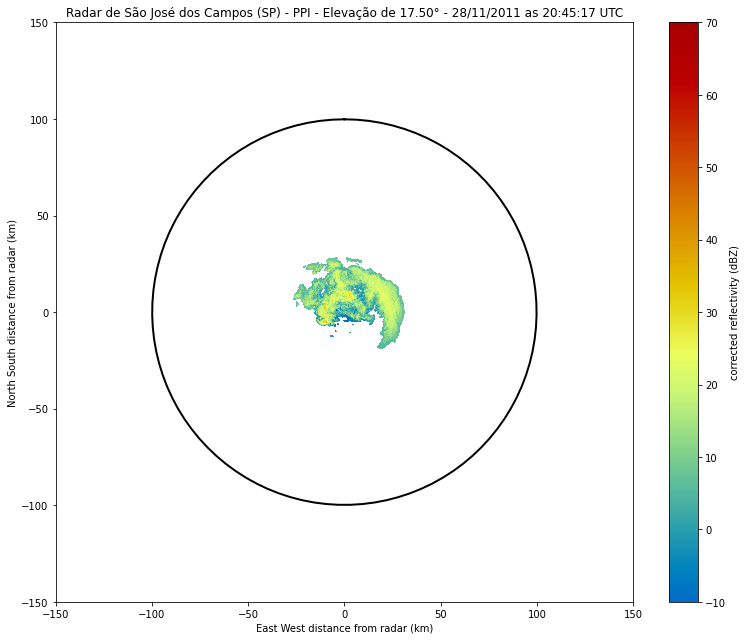

In [11]:
# SCRIPT Completo
# Autor: Camila da Cunha Lopes
# Adaptado por: Franciane Rodrigues

# Não esqueça de mudar o valor da elevação a ser estudada [0,1,...,12] possibilidades

import numpy as np
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import pyart
from cftime import num2date, date2num
import warnings
warnings.filterwarnings("ignore")

time_start = num2date(radar.time['data'][0], radar.time['units'])
time_text = ' ' + time_start.strftime('%d/%m/%Y as %H:%M:%S UTC')
elevacao1 = radar.fixed_angle['data'][10]
title1 = 'Radar de São José dos Campos (SP) - PPI - ' + 'Elevação de %.2f' % (elevacao1) + '° -' + time_text

display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(11, 9))
ax = fig.add_subplot(111)
display.plot('corrected_reflectivity', 10,
             vmin=-10., vmax=70., 
             colorbar_label='corrected reflectivity (dBZ)', 
             ax=ax, title=title1
             )

display.plot_range_ring(radar.range['data'][-1]/1000., ax=ax)
display.set_limits(xlim=(-150, 150), ylim=(-150, 150), ax=ax)

#Ajuste automático dos parâmetros da plotagem gráfica para fornecer o preenchimento especificado.
plt.tight_layout()
plt.show()